In [1]:
# Auto ML
!pip install pycaret

     |████████████████████████████████| 319 kB 5.4 MB/s 
     |████████████████████████████████| 114 kB 37.3 MB/s 
     |████████████████████████████████| 261 kB 23.6 MB/s 
     |████████████████████████████████| 6.8 MB 36.8 MB/s 
     |████████████████████████████████| 56 kB 4.1 MB/s 
     |████████████████████████████████| 16.5 MB 173 kB/s 
     |████████████████████████████████| 1.7 MB 31.6 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 2.0 MB 34.4 MB/s 
     |████████████████████████████████| 86 kB 6.2 MB/s 
     |████████████████████████████████| 167 kB 44.0 MB/s 
     |████████████████████████████████| 1.3 MB 40.4 MB/s 
     |████████████████████████████████| 636 kB 46.7 MB/s 
     |████████████████████████████████| 63 kB 1.8 MB/s 
     |████████████████████████████████| 102 kB 10.9 MB/s 
     |████████████████████

In [1]:
import pandas as pd
import numpy as np
import os
import random
random.seed(1)
from google.colab import files

# Plots
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
pd.set_option("display.max_rows",None)



In [ ]:
uploaded = files.upload()

In [2]:
indicators_health = pd.read_csv("diabetes_012_health_indicators_BRFSS2015.csv")

In [3]:
ind = pd.DataFrame(indicators_health)

In [4]:
# Index column diabetes_012 as first

ind.set_index('Diabetes_012')

In [21]:
ind

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253675,0.0,1.0,1.0,1.0,45.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,3.0,0.0,5.0,0.0,1.0,5.0,6.0,7.0
253676,2.0,1.0,1.0,1.0,18.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,0.0,0.0,1.0,0.0,11.0,2.0,4.0
253677,0.0,0.0,0.0,1.0,28.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,5.0,2.0
253678,0.0,1.0,0.0,1.0,23.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,3.0,0.0,0.0,0.0,1.0,7.0,5.0,1.0


In [22]:
# Selecting the columns we will use

ind_select = indicators_health[['Diabetes_012',
                                         'HighBP',  
                                         'HighChol', 'BMI', 
                                         'Smoker', 'Stroke',
                                         'HeartDiseaseorAttack', 'Fruits',
                                         'Veggies', 'HvyAlcoholConsump', 
                                         'Sex', 'Age', 'PhysActivity']]

In [23]:
ind_select.shape

(253680, 13)

In [24]:
ind_select.sample(200)

,Diabetes_012,HighBP,HighChol,BMI,Smoker,Stroke,HeartDiseaseorAttack,Fruits,Veggies,HvyAlcoholConsump,Sex,Age,PhysActivity
24493,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,10.0,1.0
114954,2.0,1.0,1.0,25.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,7.0,1.0
60241,0.0,1.0,0.0,38.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,10.0,1.0
207149,2.0,1.0,0.0,21.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,13.0,0.0
148512,2.0,1.0,0.0,43.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,13.0,0.0
23119,0.0,0.0,0.0,32.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,8.0,1.0
11137,2.0,1.0,1.0,44.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,11.0,1.0
122934,0.0,0.0,0.0,40.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,4.0,1.0
150129,0.0,1.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,11.0,1.0
237481,0.0,1.0,1.0,24.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,10.0,1.0


In [25]:
# Drop Missing Values - knocks 100,000 rows out right away

ind_select = ind_select.dropna()
ind_select.shape

(253680, 13)

In [26]:
# Drop Missing Values - knocks 100,000 rows out right away

ind_select = ind_select.dropna()
ind_select.shape

(253680, 13)

In [27]:
# No missing value
ind_select.isna().sum()

Diabetes_012            0
HighBP                  0
HighChol                0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
Sex                     0
Age                     0
PhysActivity            0
dtype: int64

# **VARIABLES**

In [28]:
# HighBP   - High Blood Pressure  ------  0 = no high BP 1 = high BP
# HighChol - High Cholesterol ----------- 0 = no high cholesterol 1 = high cholesterol
# BMI      - Body Mass Index / 
# Smoker   - Have you smoked at least 100 cigarettes in your entire life? / [Note: 5 packs = 100 cigarettes] 0 = no 1 = yes
# Stroke   - (Ever told) you had a stroke / 0 = no 1 = yes
# HeartDiseaseorAttack - Coronary heart disease (CHD) or myocardial infarction (MI) /  0 = no 1 = yes
# Fruits   - Consume Fruit 1 or more times per day / 0 = no 1 = yes
# Veggies  - Consume Vegetables 1 or more times per day / 0 = no 1 = yes
# HvyAlcoholConsump - Heavy drinkers (adult men having more than 14 drinks per week and adult women having more than 7 drinks per week) 0 = no
# GenHlth  - Would you say that in general your health is: /  scale 1-5 1 = excellent 2 = very good 3 = good 4 = fair 5 = poor
# Sex - 0 = female 1 = male
# Age - 13-level age category  1 = 18-24    9 = 60-64    13 = 80 or older

# **MODIFY AND CLEAN THE VALUES**

*Variable Diabetes_012 has 3 classes:*
**0** = no diabetes or only during pregnancy; 
**1** = prediabetes;
**2** = diabetes.

In [ ]:
# Collumn treatment: Diabetes_012

ind_select.Diabetes_012.unique()

In [ ]:
# Collumn treatment: HighBP

ind_select.HighBP.unique()

In [ ]:
# Collumn treatment: HighChol

ind_select.HighChol.unique()

In [ ]:
# Collumn treatment: BMI

ind_select.BMI.unique()

In [ ]:
# Column treatment: Smoker

ind_select.Smoker.unique()

In [ ]:
# Column treatment: Stroke 

ind_select.Stroke.unique()

In [ ]:
# Column treatment: HeartDiseaseorAttack 

ind_select.HeartDiseaseorAttack.unique()

In [ ]:
# Column treatment: Fruits 

ind_select.Fruits.unique()

In [ ]:
# Column treatment: Veggies  

ind_select.Veggies.unique()

In [ ]:
# Column treatment: HvyAlcoholConsump 

ind_select.HvyAlcoholConsump.unique()

In [ ]:
# Column treatment: GenHlth 

ind_select.GenHlth.unique()

In [ ]:
# Column treatment: Sex 

ind_select.Sex.unique()

In [ ]:
# Column treatment: Age 

ind_select.Age.unique()

In [ ]:
ind_select.head()

In [17]:
Diabetes = ind_select['Diabetes_012']
Diabetes.value_counts()

0.0    213703
2.0     35346
1.0      4631
Name: Diabetes_012, dtype: int64

In [18]:
# Check Class Sizes of the Diabetes_012 column

ind_select.groupby(['Diabetes_012']).size()

Diabetes_012
0.0    213703
1.0      4631
2.0     35346
dtype: int64

# **DATA VIEW**

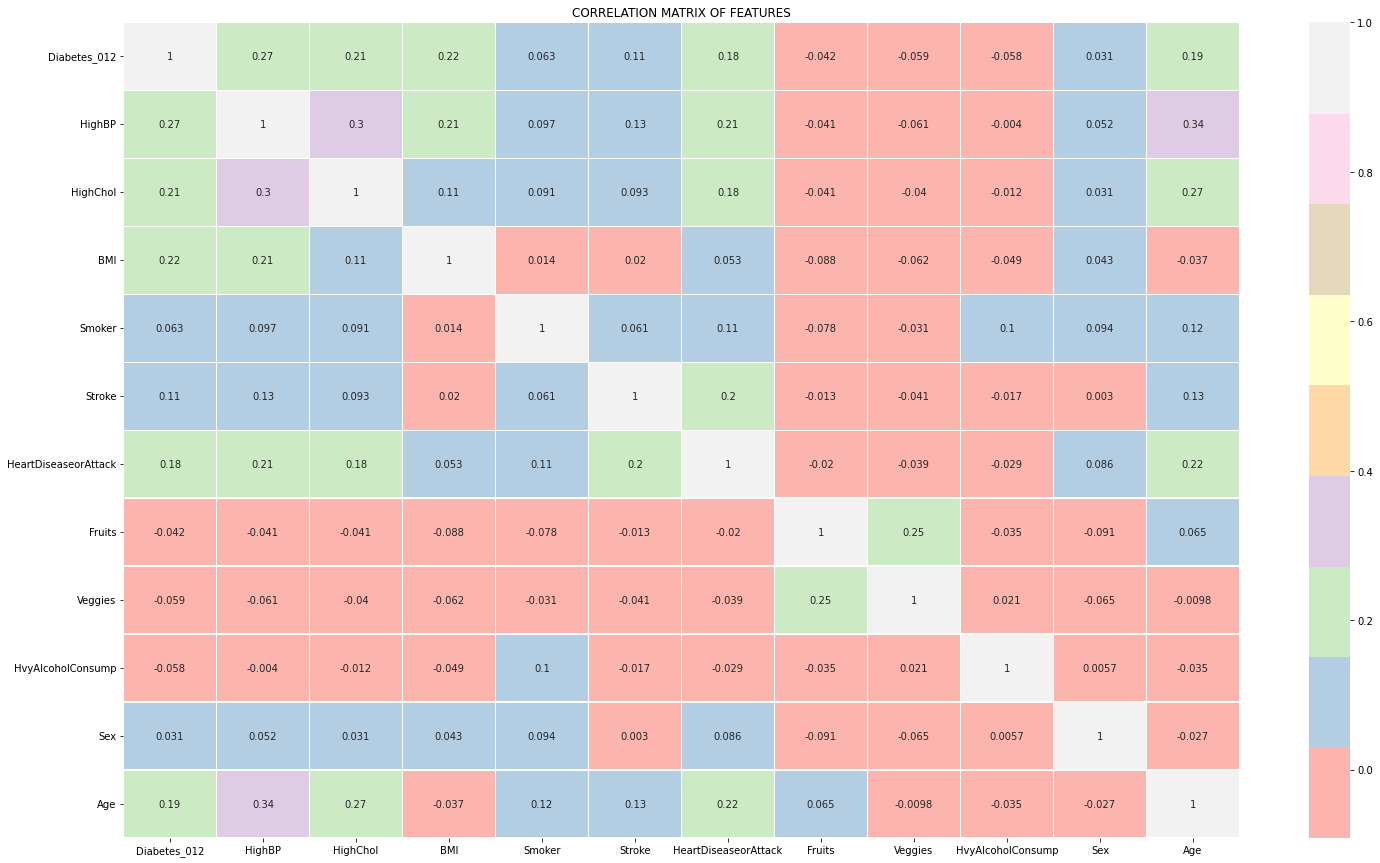

In [19]:
# CORRELATION

corr = ind_select.corr()
fig, ax = plt.subplots(figsize=(25,15)) 
sns.heatmap(corr,annot=True, cmap = "Pastel1", linewidth = 0.30)
plt.title("CORRELATION MATRIX OF FEATURES")
plt.show()

In [29]:
# cat_features = ['Sex', 'Age'] 

cat_features = ['HighBP', 'HighChol', 'Smoker', 'Stroke', 'HeartDiseaseorAttack', 'Fruits', 'Veggies', 'Sex', 'PhysActivity'] 

numeric_features = ['BMI', 'Age']


# **AUTO ML AND MODEL SELECTION**

In [20]:
from pycaret.classification import *

In [30]:
s = setup (ind_select, target='Diabetes_012'
          ,normalize = True
          ,normalize_method = "minmax"
          ,data_split_stratify = True
          ,fix_imbalance = True
          ,categorical_features=cat_features
          ,numeric_features=numeric_features
          ,use_gpu = False)

,Description,Value
0,session_id,2351
1,Target,Diabetes_012
2,Target Type,Multiclass
3,Label Encoded,None
4,Original Data,"(253680, 13)"
5,Missing Values,False
6,Numeric Features,2
7,Categorical Features,10
8,Ordinal Features,False
9,High Cardinality Features,False


In [31]:
best = compare_models(fold = 5)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
dummy,Dummy Classifier,0.8424,0.5000,0.3333,0.7097,0.7704,0.0000,0.0000,3.032
lightgbm,Light Gradient Boosting Machine,0.8004,0.7892,0.4583,0.8109,0.8039,0.3150,0.3179,14.308
dt,Decision Tree Classifier,0.7761,0.6308,0.4035,0.7791,0.7776,0.1842,0.1843,3.900
et,Extra Trees Classifier,0.7717,0.6695,0.4121,0.7839,0.7775,0.1995,0.2001,41.496
rf,Random Forest Classifier,0.7694,0.7191,0.4208,0.7884,0.7780,0.2156,0.2170,44.730
gbc,Gradient Boosting Classifier,0.7523,0.7878,0.4793,0.8215,0.7763,0.3012,0.3212,112.700
knn,K Neighbors Classifier,0.7356,0.7085,0.4354,0.7964,0.7621,0.2147,0.2224,119.072
svm,SVM - Linear Kernel,0.7180,0.0000,0.4823,0.8252,0.7560,0.2729,0.3019,3.982
ada,Ada Boost Classifier,0.6659,0.7842,0.4873,0.8328,0.7234,0.2444,0.2851,11.968
ridge,Ridge Classifier,0.6605,0.0000,0.4962,0.8367,0.7257,0.2393,0.2785,2.530


In [80]:
# o modelo lda foi ecolhido pois embora nao tenha o melhor AUC tem 4X mais desempenho do que o lr, por apenas 0.010 de AUC
model = create_model('lda', fold = 5)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.6099,0.7882,0.4995,0.8450,0.6964,0.2088,0.2582
1,0.6063,0.7868,0.4974,0.8440,0.6929,0.2059,0.2554
2,0.6112,0.7883,0.4961,0.8461,0.6981,0.2100,0.2595
3,0.6112,0.7910,0.4956,0.8456,0.6979,0.2093,0.2585
4,0.6164,0.7903,0.5034,0.8443,0.7007,0.2121,0.2601
Mean,0.6110,0.7889,0.4984,0.8450,0.6972,0.2092,0.2583
Std,0.0032,0.0015,0.0029,0.0008,0.0026,0.0020,0.0016


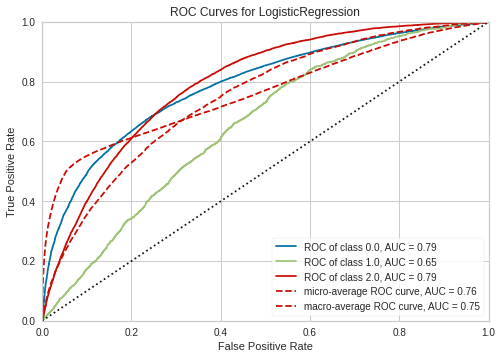

In [68]:
plot_model(model)

In [ ]:
plot_model(model, 'confusion matrix')

In [69]:
tuned_lr = tune_model(model
                      ,fold = 5,
                      optimize='AUC'                      
                      )

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.6256,0.7901,0.5084,0.8433,0.7049,0.2216,0.2692
1,0.6206,0.7879,0.5024,0.8421,0.7006,0.2165,0.2641
2,0.6278,0.7892,0.4956,0.8430,0.7068,0.2216,0.2682
3,0.6250,0.7921,0.4978,0.8443,0.7054,0.2207,0.2683
4,0.6320,0.7911,0.4968,0.8417,0.7091,0.2226,0.2678
Mean,0.6262,0.7901,0.5002,0.8429,0.7053,0.2206,0.2675
Std,0.0037,0.0015,0.0047,0.0009,0.0028,0.0021,0.0018


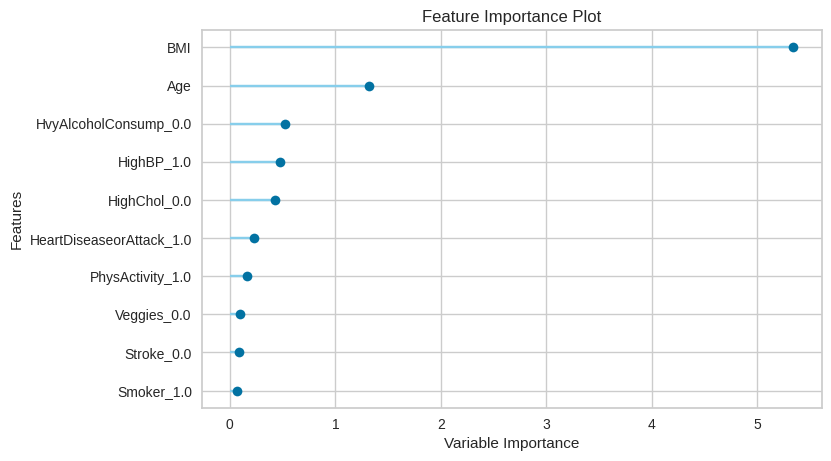

In [71]:
plot_model(estimator = tuned_lr, plot = 'feature')

In [72]:
df_predict = predict_model(tuned_lr, data=ind_select)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Logistic Regression,0.6254,0.7894,0.499,0.8423,0.7045,0.2196,0.2664


In [73]:
df_predict['Label'].value_counts()

0    145956
2     57883
1     49841
Name: Label, dtype: int64

In [74]:
df_predict.sample(20)

,Diabetes_012,HighBP,HighChol,BMI,Smoker,Stroke,HeartDiseaseorAttack,Fruits,Veggies,HvyAlcoholConsump,Sex,Age,PhysActivity,Label,Score
136439,0.0,0.0,0.0,28.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,8.0,1.0,0,0.5238
244388,0.0,0.0,1.0,23.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,13.0,1.0,1,0.4363
233321,0.0,0.0,0.0,18.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,5.0,1.0,0,0.8564
60503,2.0,1.0,1.0,28.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,11.0,1.0,2,0.5470
240201,2.0,1.0,0.0,29.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,10.0,1.0,1,0.3822
37744,0.0,0.0,0.0,38.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,7.0,1.0,0,0.4261
90130,0.0,1.0,1.0,24.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,5.0,0.0,0,0.5892
165630,1.0,1.0,1.0,31.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,10.0,1.0,1,0.4228
96301,0.0,1.0,0.0,30.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,7.0,1.0,0,0.4125
187031,0.0,0.0,0.0,31.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,6.0,1.0,0,0.5968


In [76]:
final = finalize_model(tuned_lr)

In [77]:
save_model(final, 'model')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=['HighBP',
                                                             'HighChol',
                                                             'Smoker', 'Stroke',
                                                             'HeartDiseaseorAttack',
                                                             'Fruits', 'Veggies',
                                                             'Sex',
                                                             'PhysActivity'],
                                       display_types=True, features_todrop=[],
                                       id_columns=[],
                                       ml_usecase='classification',
                                       numerical_features=['BMI', 'Age'],
                                       target='Diabetes_012',
                                       time_features=[])),
               

In [78]:
model = load_model('model')

Transformation Pipeline and Model Successfully Loaded


In [79]:
data_teste = pd.DataFrame()
data_teste['HighBP'] = [0]  
data_teste['HighChol'] = [0]
data_teste['BMI'] = [21]
data_teste['Smoker'] = [0] 
data_teste['Stroke'] = [1]
data_teste['HeartDiseaseorAttack'] = [0] 
data_teste['Fruits'] = [1] 
data_teste['Veggies'] = [1]
data_teste['HvyAlcoholConsump'] = [0]
data_teste['Sex'] = [1]
data_teste['PhysActivity'] = [1]
data_teste['Age'] = [1]

#realiza a predição.
result = predict_model(model, data=data_teste)

#recupera os resultados.
classe = result["Label"][0]
prob = result["Score"][0]*100

print(classe)
print(prob)

0
61.8


In [ ]:
data_teste